In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd # To open .xls files

from io import BytesIO
from zipfile import ZipFile
import urllib.request

print('Downloading the archive... ', end = '')
url = urllib.request.urlopen("https://www.insee.fr/fr/statistiques/fichier/1893204/pop-sexe-age-quinquennal6817.zip")
print('Done!')

print('Extracting zipped files into the current directory... ', end = '') 
with ZipFile(BytesIO(url.read())) as zip_archive:
    for zipped_file in zip_archive.namelist():
        zip_archive.extract(zipped_file)
print('Done!')

Extracting zipped files into the current directory... Done!


In [2]:
print('Opening the Excel file... ', end = '')
workbook = xlrd.open_workbook('pop-sexe-age-quinquennal6817.xls')
worksheet = workbook['COM_2017']
print('Done!')

print('Reading the Excel file... ', end = '')

print('Codes... ', end = '')
codes = [str(worksheet[r][1].value)[0:2] + # Some DR codes have three digits, use only first two
        str(worksheet[r][2].value)
            for r in range(14, worksheet.nrows)]

print('Names... ', end = '')
names = [worksheet[r][5].value for r in range(14, worksheet.nrows)]

print('Population per group... ', end = '')
pop = np.array([[worksheet[r][c].value
                    for c in range(6, worksheet.ncols)]
                        for r in range(14, worksheet.nrows)])
print('Done!')

cond = np.array(pop[:, 6] != '') # Indices to remove non-existent communes (with empty cells)
codes = np.array(codes)[cond]
names = np.array(names)[cond]

pop = pop[cond, :]
pop = pop.astype(np.double) #  Every cell is double in Excel
pop = pop.astype(np.int64) # Convert to int

Opening the Excel file... Done!
Reading the Excel file... Codes... Names... Population per group... Done!


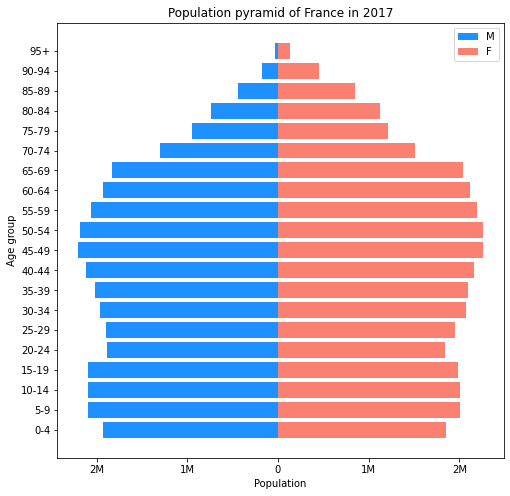

In [3]:
pop_per_age = pop.sum(axis = 0) # Sum over communes
m = pop_per_age[0::2]
f = pop_per_age[1::2]

fig = plt.figure(figsize = (8, 8))

plt.barh(np.arange(len(m)), -m, color = 'dodgerblue', label = 'M')
plt.barh(np.arange(len(m)), f, color = 'salmon', label = 'F')

plt.xlabel('Population')
plt.ylabel('Age group')
plt.title('Population pyramid of France in 2017')
plt.legend(loc = 'upper right')
plt.xticks([-2e6, -1e6, 0, 1e6, 2e6], ['2M', '1M', '0', '1M', '2M'])
ylbl = [str(i * 5) + '-' + str(i * 5 + 4) for i in range(0, 20)]
ylbl[19] = '95+'
plt.yticks(np.arange(len(m)), ylbl);